In [1]:
# !git clone https://github.com/SamuunJinnie/pm2.5

Cloning into 'pm2.5'...


In [2]:
# !mv ./pm2.5/* .

In [35]:
provinces = ['BKK', 'Chiangmai', 'Khonkaen', 'Rayong', 'Saraburi', 'Surat']

In [2]:
import pandas as pd

In [4]:

def format_datetime(df):
  df['date_time'] = pd.to_datetime(df['date_time'])
  df = df.set_index('date_time')
  return df

In [3]:
def format_datetime_2(df):
    df['date_time'] = pd.to_datetime(df['date_time'] , format='%d/%m/%Y %H:%M')
    df = df.set_index('date_time')
    return df

In [5]:
def get_train_data(prov):
  df_train = pd.read_csv(prov + '/train/' + prov.lower() + '_train.csv')
  df_temp_surface = pd.read_csv(prov + '/train/' + prov.lower() + '_temp_surface.csv')
  df_weather_wind = pd.read_csv(prov + '/train/' + prov.lower() + '_weather_wind.csv')
  df_so2 = pd.read_csv(prov + '/train/' + prov.lower() + '_so2_surface_train.csv')
  df_rh = pd.read_csv(prov + '/train/' + prov.lower() + '_RH_train.csv')
  df_train = df_train.rename(columns={'Unnamed: 0':'date_time'})
  df_train, df_temp_surface, df_weather_wind, df_so2, df_rh = format_datetime(df_train), format_datetime(df_temp_surface), format_datetime(df_weather_wind), format_datetime(df_so2), format_datetime(df_rh)
  df_train, df_temp_surface, df_weather_wind, df_so2, df_rh = df_train.interpolate(), df_temp_surface.interpolate(), df_weather_wind.interpolate(), df_so2.interpolate(), df_rh.interpolate()
  df_train, df_temp_surface, df_weather_wind, df_so2, df_rh = df_train.resample('h').ffill(), df_temp_surface.resample('h').ffill(), df_weather_wind.resample('h').ffill(), df_so2.resample('h').ffill(), df_rh.resample('h').ffill()
  return df_train, df_temp_surface, df_weather_wind, df_so2, df_rh

In [6]:
def get_test_data(prov):
  df_test = pd.read_csv(f'{prov}/test/{prov.lower()}_test.csv')
  df_temp_surface_test = pd.read_csv(f'{prov}/test/{prov.lower()}_temp_surface_test.csv')
  df_weather_wind_test = pd.read_csv(f'{prov}/test/{prov.lower()}_weather_wind_test.csv')
  df_so2_test = pd.read_csv(prov + '/test/' + prov.lower() + '_so2_surface_test.csv')
  df_rh_test = pd.read_csv(prov + '/test/' + prov.lower() + '_RH_test.csv')
  df_test = df_test.rename(columns={'Unnamed: 0':'date_time'})
  df_test, df_temp_surface_test, df_weather_wind_test, df_so2_test, df_rh_test = format_datetime(df_test), format_datetime_2(df_temp_surface_test), format_datetime_2(df_weather_wind_test),format_datetime(df_so2_test),format_datetime(df_rh_test)
  df_test, df_temp_surface_test, df_weather_wind_test, df_so2_test, df_rh_test = df_test.interpolate(), df_temp_surface_test.interpolate(), df_weather_wind_test.interpolate(), df_so2_test.interpolate(), df_rh_test.interpolate()
  df_test, df_temp_surface_test,df_weather_wind_test, df_so2_test, df_rh_test = df_test.resample('h').ffill(), df_temp_surface_test.resample('h').ffill(), df_weather_wind_test.resample('h').ffill(), df_so2_test.resample('h').ffill(), df_rh_test.resample('h').ffill()
  return df_test, df_temp_surface_test, df_weather_wind_test, df_so2_test, df_rh_test

In [7]:
def get_na_rows(df, col):
  return df[df[col].isna() == True].index.to_list()

In [36]:
df_train, df_temp_surface, df_weather_wind, df_so2, df_rh = get_train_data('Surat')
df_test, df_temp_surface_test, df_weather_wind_test, df_so2_test, df_rh_test = get_test_data('Surat')

In [37]:
display(df_test.tail())
display(df_temp_surface_test.tail())
display(df_weather_wind_test.tail())
display(df_so2_test.tail())
display(df_rh_test.tail())

,PM2.5
date_time,
2021-07-01 19:00:00,13.0
2021-07-01 20:00:00,13.0
2021-07-01 21:00:00,14.0
2021-07-01 22:00:00,14.0
2021-07-01 23:00:00,14.0


,temp,Unnamed: 2
date_time,,
2021-07-01 18:00:00,30.2,NaN
2021-07-01 19:00:00,26.8,NaN
2021-07-01 20:00:00,26.8,NaN
2021-07-01 21:00:00,26.8,NaN
2021-07-01 22:00:00,25.7,NaN


,wind speed,wind dir
date_time,,
2021-07-01 18:00:00,10,250
2021-07-01 19:00:00,9,245
2021-07-01 20:00:00,9,245
2021-07-01 21:00:00,9,245
2021-07-01 22:00:00,9,235


,so2 (ug/m^3)
date_time,
2021-07-01 18:00:00,0.48
2021-07-01 19:00:00,1.16
2021-07-01 20:00:00,1.16
2021-07-01 21:00:00,1.16
2021-07-01 22:00:00,1.65


,RH
date_time,
2021-07-01 18:00:00,63.0
2021-07-01 19:00:00,79.0
2021-07-01 20:00:00,79.0
2021-07-01 21:00:00,79.0
2021-07-01 22:00:00,83.0


In [38]:
df_temp_surface_test.drop('Unnamed: 2', inplace=True, axis='columns')

In [39]:
df_temp_surface_test.tail()

,temp
date_time,
2021-07-01 18:00:00,30.2
2021-07-01 19:00:00,26.8
2021-07-01 20:00:00,26.8
2021-07-01 21:00:00,26.8
2021-07-01 22:00:00,25.7


In [40]:
print(df_temp_surface.shape)
print(df_weather_wind.shape)
print(df_so2.shape)
print(df_rh.shape)
print(df_train.shape)

(26302, 1)
(26302, 2)
(26302, 1)
(26302, 1)
(15336, 1)


In [41]:
display(df_train.tail())
display(df_temp_surface.tail())
display(df_weather_wind.tail())
display(df_so2.tail())
display(df_rh.tail())

,PM2.5
date_time,
2020-06-30 19:00:00,29.0
2020-06-30 20:00:00,16.0
2020-06-30 21:00:00,15.0
2020-06-30 22:00:00,20.0
2020-06-30 23:00:00,21.0


,temp
date_time,
2020-06-30 18:00:00,30.8
2020-06-30 19:00:00,26.7
2020-06-30 20:00:00,26.7
2020-06-30 21:00:00,26.7
2020-06-30 22:00:00,25.9


,wind speed,wind dir
date_time,,
2020-06-30 18:00:00,19,255
2020-06-30 19:00:00,19,250
2020-06-30 20:00:00,19,250
2020-06-30 21:00:00,19,250
2020-06-30 22:00:00,23,260


,so2 (ug/m^3)
date_time,
2020-06-30 18:00:00,0.54
2020-06-30 19:00:00,1.15
2020-06-30 20:00:00,1.15
2020-06-30 21:00:00,1.15
2020-06-30 22:00:00,2.35


,RH
date_time,
2020-06-30 18:00:00,61.0
2020-06-30 19:00:00,83.0
2020-06-30 20:00:00,83.0
2020-06-30 21:00:00,83.0
2020-06-30 22:00:00,85.0


In [42]:
import matplotlib.pyplot as plt

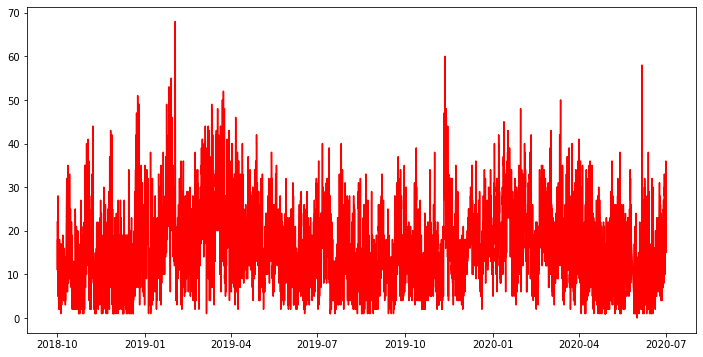

In [43]:
plt.figure(figsize=(12,6))
plt.plot(df_train,'r')

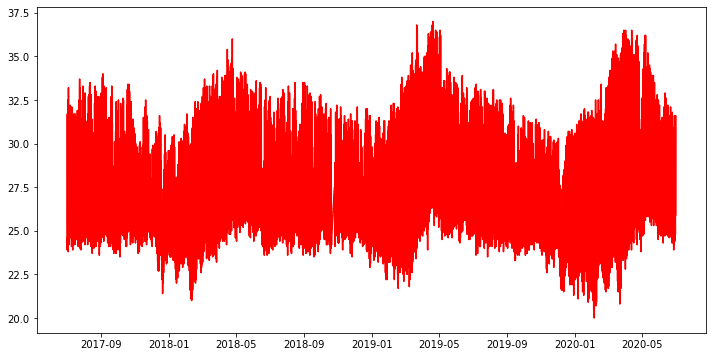

In [44]:
plt.figure(figsize=(12,6))
plt.plot(df_temp_surface,'r')

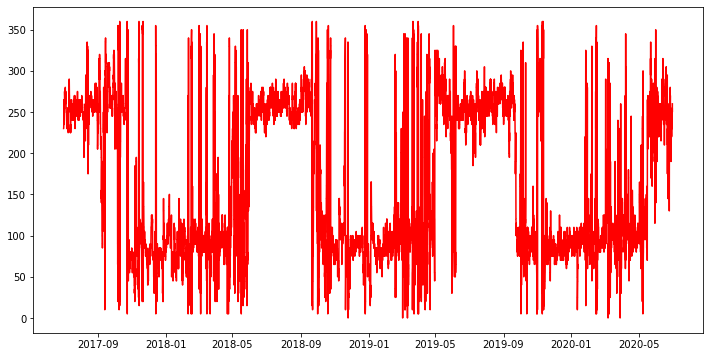

In [45]:
plt.figure(figsize=(12,6))
plt.plot(df_weather_wind['wind dir'],'r')

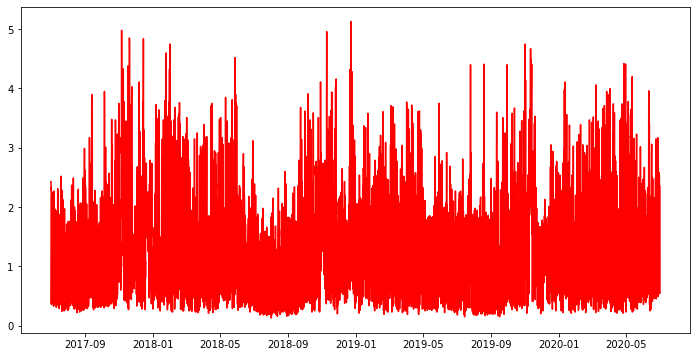

In [46]:
plt.figure(figsize=(12,6))
plt.plot(df_so2['so2 (ug/m^3)'],'r')

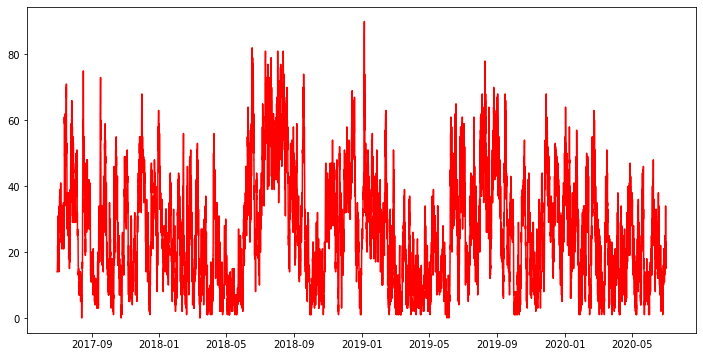

In [47]:
plt.figure(figsize=(12,6))
plt.plot(df_weather_wind['wind speed'],'r')

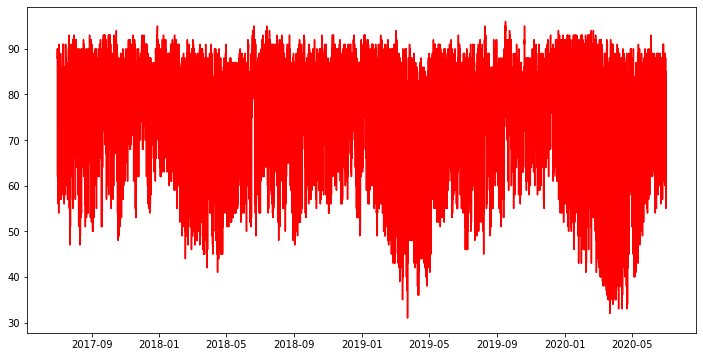

In [48]:
plt.figure(figsize=(12,6))
plt.plot(df_rh['RH'],'r')

In [49]:
df_temp_0 = pd.DataFrame({'date_time': ['07/01/2017 00:00:00'], 'temp':[0]})
df_temp_0 = format_datetime(df_temp_0)
df_wind_0 = pd.DataFrame({'date_time': ['07/01/2017 00:00:00'], 'wind dir':[0],'wind speed':[0]})
df_wind_0 = format_datetime(df_wind_0)
df_so2_0 = pd.DataFrame({'date_time': ['07/01/2017 00:00:00'], 'so2 (ug/m^3)':[0]})
df_so2_0 = format_datetime(df_so2_0)
df_rh_0 = pd.DataFrame({'date_time': ['07/01/2017 00:00:00'], 'RH':[0]})
df_rh_0 = format_datetime(df_rh_0)

In [50]:
df_temp_1 = pd.DataFrame({'date_time': ['06/30/2020 23:00:00'], 'temp':[df_temp_surface['temp'].iloc[26301]]})
df_temp_1 = format_datetime(df_temp_1)
df_wind_1 = pd.DataFrame({'date_time': ['06/30/2020 23:00:00'], 'wind dir':[df_weather_wind['wind dir'].iloc[26301]],'wind speed':[df_weather_wind['wind speed'].iloc[26301]]})
df_wind_1 = format_datetime(df_wind_1)
df_so2_1 = pd.DataFrame({'date_time': ['06/30/2020 23:00:00'], 'so2 (ug/m^3)':[df_so2['so2 (ug/m^3)'].iloc[26301]]})
df_so2_1 = format_datetime(df_so2_1)
df_rh_1 = pd.DataFrame({'date_time': ['06/30/2020 23:00:00'], 'RH':[df_rh['RH'].iloc[26301]]})
df_rh_1 = format_datetime(df_rh_1)

In [51]:
df_temp_surface = pd.concat([df_temp_0,df_temp_surface,df_temp_1])
df_weather_wind = pd.concat([df_wind_0,df_weather_wind,df_wind_1])
df_so2 = pd.concat([df_so2_0,df_so2,df_so2_1])
df_rh = pd.concat([df_rh_0,df_rh,df_rh_1])

In [52]:
data = df_train.merge(df_weather_wind,left_index=True,right_index=True)
data = data.merge(df_temp_surface,left_index=True,right_index=True)
data = data.merge(df_so2,left_index=True,right_index=True)
data = data.merge(df_rh,left_index=True,right_index=True)
data

,PM2.5,wind dir,wind speed,temp,so2 (ug/m^3),RH
date_time,,,,,,
2018-10-01 00:00:00,22.0,200,3,26.6,2.03,85.0
2018-10-01 01:00:00,17.0,90,3,25.8,2.92,87.0
2018-10-01 02:00:00,13.0,90,3,25.8,2.92,87.0
2018-10-01 03:00:00,12.0,90,3,25.8,2.92,87.0
2018-10-01 04:00:00,11.0,105,1,25.2,3.08,89.0
...,...,...,...,...,...,...
2020-06-30 19:00:00,29.0,250,19,26.7,1.15,83.0
2020-06-30 20:00:00,16.0,250,19,26.7,1.15,83.0
2020-06-30 21:00:00,15.0,250,19,26.7,1.15,83.0


In [53]:
df_temp_test_0 = pd.DataFrame({'date_time': ['07/01/2020 00:00:00'], 'temp':[0]})
df_temp_test_0 = format_datetime(df_temp_test_0)
df_wind_test_0 = pd.DataFrame({'date_time': ['07/01/2020 00:00:00'], 'wind dir':[0],'wind speed':[0]})
df_wind_test_0 = format_datetime(df_wind_test_0)
df_so2_test_0 = pd.DataFrame({'date_time': ['07/01/2020 00:00:00'], 'so2 (ug/m^3)':[0]})
df_so2_test_0 = format_datetime(df_so2_test_0)
df_rh_test_0 = pd.DataFrame({'date_time': ['07/01/2020 00:00:00'], 'RH':[0]})
df_rh_test_0 = format_datetime(df_rh_test_0)

In [54]:
df_temp_test_1 = pd.DataFrame({'date_time': ['07/01/2021 23:00:00'], 'temp':[df_temp_surface_test['temp'].iloc[8781]]})
df_temp_test_1 = format_datetime(df_temp_test_1)
df_wind_test_1 = pd.DataFrame({'date_time': ['07/01/2021 23:00:00'], 'wind dir':[df_weather_wind_test['wind dir'].iloc[8781]],'wind speed':[df_weather_wind_test['wind speed'].iloc[8781]]})
df_wind_test_1 = format_datetime(df_wind_test_1)
df_so2_test_1 = pd.DataFrame({'date_time': ['07/01/2021 23:00:00'], 'so2 (ug/m^3)':[df_so2_test['so2 (ug/m^3)'].iloc[8781]]})
df_so2_test_1 = format_datetime(df_so2_test_1)
df_rh_test_1 = pd.DataFrame({'date_time': ['07/01/2021 23:00:00'], 'RH':[df_rh_test['RH'].iloc[8781]]})
df_rh_test_1 = format_datetime(df_rh_test_1)

In [55]:
df_temp_surface_test = pd.concat([df_temp_test_0,df_temp_surface_test,df_temp_test_1])
df_weather_wind_test = pd.concat([df_wind_test_0,df_weather_wind_test,df_wind_test_1])
df_so2_test = pd.concat([df_so2_test_0,df_so2_test,df_so2_test_1])
df_rh_test = pd.concat([df_rh_test_0,df_rh_test,df_rh_test_1])

In [56]:
test = df_test.merge(df_temp_surface_test,left_index=True,right_index=True)
test['wind dir'] = df_weather_wind_test['wind dir'].values
test['wind speed'] = df_weather_wind_test['wind speed'].values
test = test.merge(df_so2_test,left_index=True,right_index=True)
test = test.merge(df_rh_test,left_index=True,right_index=True)
test

,PM2.5,temp,wind dir,wind speed,so2 (ug/m^3),RH
date_time,,,,,,
2020-07-01 00:00:00,19.0,0.0,0,0,0.00,0.0
2020-07-01 01:00:00,22.0,25.2,255,21,2.76,88.0
2020-07-01 02:00:00,28.0,25.2,255,21,2.76,88.0
2020-07-01 03:00:00,25.0,25.2,255,21,2.76,88.0
2020-07-01 04:00:00,19.0,24.7,255,29,3.54,90.0
...,...,...,...,...,...,...
2021-07-01 19:00:00,13.0,26.8,245,9,1.16,79.0
2021-07-01 20:00:00,13.0,26.8,245,9,1.16,79.0
2021-07-01 21:00:00,14.0,26.8,245,9,1.16,79.0


# Split data

In [25]:
#train_size, valid_size = map(lambda r: int(r*data.shape[0]), (0.7, 0.3))

In [57]:
#train, valid = data.iloc[:train_size], data.iloc[train_size:]
train = data

In [58]:
train.shape

(15336, 6)

In [59]:
#valid.shape

In [60]:
exog_columns = ['wind speed','wind dir','temp','so2 (ug/m^3)','RH']

# Fit model with exogenous data

In [62]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
import math

In [65]:
pdq = [(0,0,1),(0,1,1),(0,2,1),(1,0,0),(1,1,0),(1,2,0),(0,0,2),]
seasonal_pdq = [(1,0,0,12),(0,0,1,12),(1,1,0,12),(0,1,1,12)]
params = [] 
params_s = [] 
aics = [] 
mses = []
cnt = 0 
for param in pdq:
  for param_seasonal in seasonal_pdq:
    mod = SARIMAX(train['PM2.5'],
    exog=train[exog_columns],
    order=param,
    seasonal_order=param_seasonal,
    freq='H',
    enforce_stationarity=False,
    enforce_invertibility=False)
    results = mod.fit()
    #test_exog = pd.concat((valid[exog_columns], test[exog_columns]), axis=0)
    pred = results.get_prediction(start=test.index[0], end=test.index[-1], exog=test[exog_columns], dynamic=False)
    pred_ci = pred.conf_int()
    params.append(param)
    params_s.append(param_seasonal)
    aics.append(results.aic)
    mse = mean_squared_error(test['PM2.5'], pred.predicted_mean)
    rmse = math.sqrt(mse) 
    mses.append(rmse)
    print('SARIMAX{}x{} - AIC:{} - MSE:{}'.format(param, param_seasonal,results.aic, mses[-1]))

C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(1, 0, 0, 12) - AIC:91437.12677484589 - MSE:8.234667039735678


C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(0, 0, 1, 12) - AIC:92373.6865588614 - MSE:8.109153860901166


C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


SARIMAX(0, 0, 1)x(1, 1, 0, 12) - AIC:90613.58779861315 - MSE:10.235916349231948


C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


SARIMAX(0, 0, 1)x(0, 1, 1, 12) - AIC:89035.61310329006 - MSE:7.782467572912442


C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


SARIMAX(0, 1, 1)x(1, 0, 0, 12) - AIC:82215.44484609074 - MSE:8.274346241121558


C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


SARIMAX(0, 1, 1)x(0, 0, 1, 12) - AIC:82311.63746841514 - MSE:8.394820617775231


C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


SARIMAX(0, 1, 1)x(1, 1, 0, 12) - AIC:84920.41463677885 - MSE:972.5142377849372


C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


SARIMAX(0, 1, 1)x(0, 1, 1, 12) - AIC:81529.46497984967 - MSE:52.54020227521851


C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 1)x(1, 0, 0, 12) - AIC:82956.72782284298 - MSE:8.502210666603288


C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 1)x(0, 0, 1, 12) - AIC:83042.79570418279 - MSE:8.453281190956748


C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 1)x(1, 1, 0, 12) - AIC:85277.66769581231 - MSE:605.9168444705164


C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 1)x(0, 1, 1, 12) - AIC:82064.1576419402 - MSE:137.47575340653125


C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 0, 0)x(1, 0, 0, 12) - AIC:82183.38874700881 - MSE:8.423357652599677


C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 0, 0)x(0, 0, 1, 12) - AIC:82343.83178522726 - MSE:8.4234174618264


C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 0, 0)x(1, 1, 0, 12) - AIC:84026.25779213196 - MSE:9.78722225742452


C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 0, 0)x(0, 1, 1, 12) - AIC:81105.89190400598 - MSE:7.997640999576888


C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 1, 0)x(1, 0, 0, 12) - AIC:82441.91565347768 - MSE:8.26355658493409


C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 1, 0)x(0, 0, 1, 12) - AIC:82574.53427160472 - MSE:8.410491309989112


C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 1, 0)x(1, 1, 0, 12) - AIC:85000.358032374 - MSE:1018.0820073083801


C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 1, 0)x(0, 1, 1, 12) - AIC:81712.33943099767 - MSE:36.793677322026944


C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 2, 0)x(1, 0, 0, 12) - AIC:88990.55846371113 - MSE:13078.639448539801


C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 2, 0)x(0, 0, 1, 12) - AIC:89234.19478192445 - MSE:12008.701211806247


C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 2, 0)x(1, 1, 0, 12) - AIC:91614.8614625647 - MSE:144362.53747513358


C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 2, 0)x(0, 1, 1, 12) - AIC:88426.5292986318 - MSE:167191.03326452803


C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 2)x(1, 0, 0, 12) - AIC:86083.76095305852 - MSE:7.99389252667335


C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 2)x(0, 0, 1, 12) - AIC:86409.58082575453 - MSE:7.960403485098606


C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


SARIMAX(0, 0, 2)x(1, 1, 0, 12) - AIC:86096.95909322746 - MSE:10.040389951963283


C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 2)x(0, 1, 1, 12) - AIC:84147.36076916449 - MSE:7.509305032035035


In [66]:
train.shape

(15336, 6)

In [67]:
def getBestParams(inputlist):
 
    #get the minimum value in the list
    min_value = min(inputlist)
 
    #return the index of minimum value 
    min_index=inputlist.index(min_value)
    return params[min_index], params_s[min_index]

In [68]:
bestPDQ, bestSeasonalPDQ = getBestParams(mses)

In [69]:
print(bestPDQ,bestSeasonalPDQ)

(0, 0, 2) (0, 1, 1, 12)


In [70]:
mod = SARIMAX(train['PM2.5'],
              exog=train[exog_columns],
              order=bestPDQ,
              seasonal_order=bestSeasonalPDQ,
              enforce_stationarity=False,
              enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Amin pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
wind speed      -0.0524      0.006     -8.330      0.000      -0.065      -0.040
wind dir        -0.0067      0.001     -8.186      0.000      -0.008      -0.005
temp            -1.0956      0.077    -14.295      0.000      -1.246      -0.945
so2 (ug/m^3)     1.8296      0.085     21.404      0.000       1.662       1.997
RH              -0.2387      0.017    -13.968      0.000      -0.272      -0.205
ma.L1            1.0342      0.005    213.877      0.000       1.025       1.044
ma.L2            0.5097      0.005     93.790      0.000       0.499       0.520
ma.S.L12        -0.8643      0.004   -236.224      0.000      -0.871      -0.857
sigma2          14.2525      0.101    141.456      0.000      14.055      14.450


# Predict on test

In [73]:
# test_exog = pd.concat((valid[exog_columns], test[exog_columns]), axis=0)

In [74]:
pred = results.get_prediction(start=test.index[0], end=test.index[-1], exog=test[exog_columns], dynamic=False)
pred_ci = pred.conf_int()

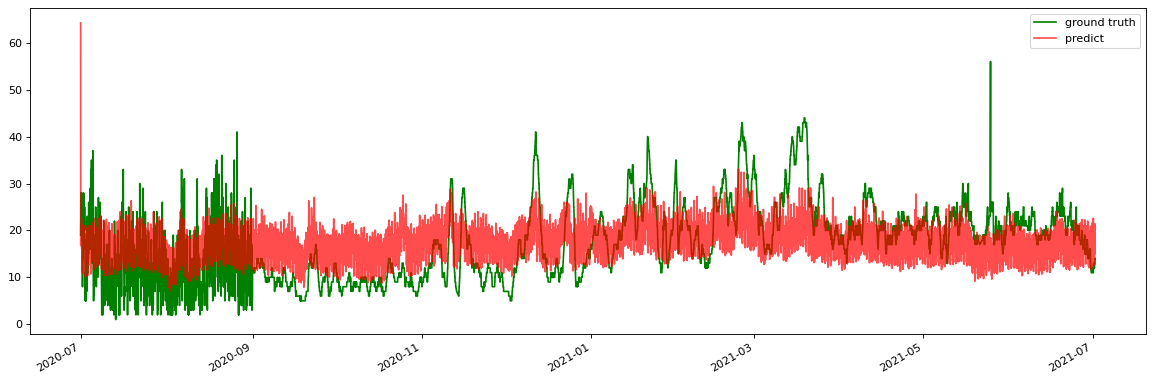

In [76]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test['PM2.5'], color='g',label='ground truth')
pred.predicted_mean.plot(alpha=.7, color='r',label='predict')
plt.legend(loc="upper right")

plt.show()

In [77]:
import math

In [78]:
mse = mean_squared_error(test['PM2.5'], pred.predicted_mean)
rmse = math.sqrt(mse)
print('Test on SARIMAX with RMSE: %f' % (rmse, ))

Test on SARIMAX with RMSE: 7.509305


In [79]:
pred.predicted_mean

2020-07-01 00:00:00    64.269678
2020-07-01 01:00:00    16.974266
2020-07-01 02:00:00    18.794507
2020-07-01 03:00:00    19.798664
2020-07-01 04:00:00    17.003235
                         ...    
2021-07-01 19:00:00    20.284762
2021-07-01 20:00:00    15.921984
2021-07-01 21:00:00    15.043952
2021-07-01 22:00:00    21.129386
2021-07-01 23:00:00    21.363486
Freq: H, Name: predicted_mean, Length: 8784, dtype: float64

In [80]:
pred.predicted_mean.to_csv('predict.csv', index=True)